In [57]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.manifold import MDS
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discrinant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier


In [58]:
dtf = pd.read_csv('data/games.csv', sep=',')
dtf.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1


In [59]:
dtf.shape

(25024, 21)

In [60]:
target = dtf["HOME_TEAM_WINS"]

In [61]:
#remove col date
dtf = dtf.drop("GAME_DATE_EST", 1)
dtf = dtf.drop("GAME_STATUS_TEXT", 1)


C:\Users\MOUSSA~1\AppData\Local\Temp/ipykernel_3828/2771486509.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dtf = dtf.drop("GAME_DATE_EST", 1)
C:\Users\MOUSSA~1\AppData\Local\Temp/ipykernel_3828/2771486509.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dtf = dtf.drop("GAME_STATUS_TEXT", 1)


In [62]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

In [66]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
#We replace missing value by column mean
for k,v in dic_cols.items():
    x = dtf[k].median()
    dtf[k].fillna(x, inplace = True)

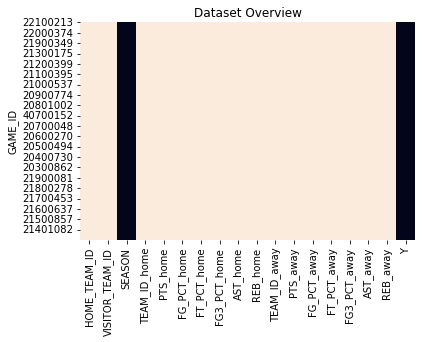

 Categerocial   Numeric   NaN 


In [67]:
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [68]:
dtf = dtf.set_index("GAME_ID")
dtf = dtf.rename(columns={"HOME_TEAM_WINS":"Y"})

KeyError: "None of ['GAME_ID'] are in the columns"

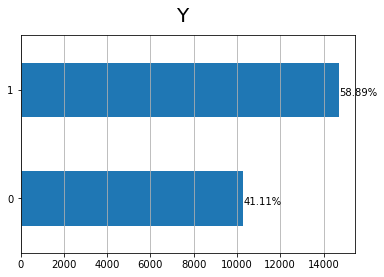

In [69]:
y = "Y"
ax = dtf[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(dtf, target, test_size=0.2, random_state=0)

In [71]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
X_train.shape

(20019, 1)

In [73]:
'''
-Use different method reduction
- compute their accurancy
- Compare different accurancy and take that one has hight 
'''
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
pca.fit(X_train)

PCA(n_components=2)

In [74]:
#Accuracy PCA
print('Accuracy', accuracy_score(y_test, y_pred))

Accuracy 0.9600399600399601


Text(0, 0.5, 'Second principle component')

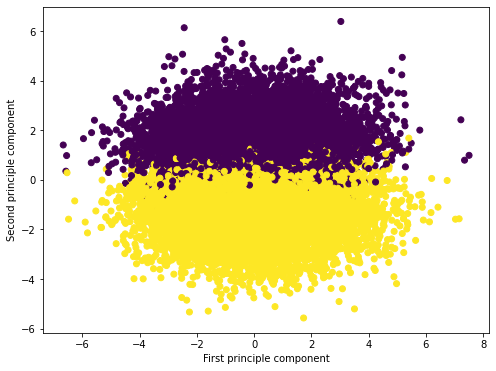

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

Accuracy 1.0


Text(0, 0.5, 'Second principle component')

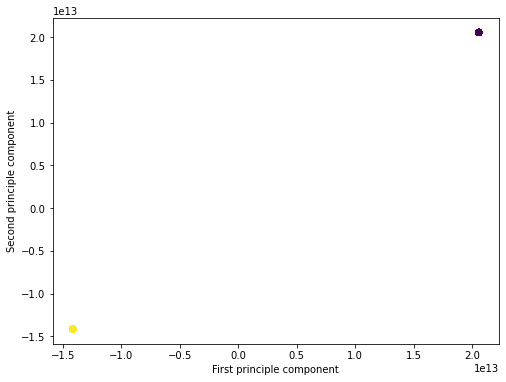